In [1]:
job_title= 'Data Analyst' #you can change this to any job position you are searcing for 
location = 'New York' # You can change this to any location you are searching in 
pageNum = 1 #how many pages you want to scrape 

In [2]:
pwd


'/Users/camillebai/Documents/web analytics 2021'

In [2]:
from bs4 import BeautifulSoup
import re
import time
import requests
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
import sklearn
import seaborn
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


from nltk.corpus import stopwords
%pip install -U nltk
import nltk
nltk.download()

from os import path
from PIL import Image


Note: you may need to restart the kernel to use updated packages.
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [50]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Note: you may need to restart the kernel to use updated packages.


In [3]:
def check_exists_by_xpath(xpath):
    try:
        browser.find_element_by_xpath(xpath)
    except NoSuchElementException:
        return False
    return True


def pageLink(job_title, location):
    test = 'https://www.indeed.com/jobs?q={}&l={}'
    url = test.format(job_title,location)
    return url

In [4]:
data = pd.DataFrame(columns = ['Position', 'Location', 'Company', 'Rating', 'JobType', 'JobDescription'])

In [5]:
pageLink = pageLink(job_title, location)
path = '/Users/camillebai/Documents/web analytics 2021/chromedriver'
browser = webdriver.Chrome(path)
browser.get(pageLink)
page_source = browser.page_source
soup = BeautifulSoup(page_source, 'lxml')
time.sleep(2)

In [6]:
linksNew =[]
#j = soup.find_all('div', 'more_links')
#k = str(j)
#ids = k.split("jk=")
for i in range(1,pageNum + 1 ):
    j = soup.find_all('div', 'more_links')
    k = str(j)
    ids = k.split("jk=")
    for i in range(1,len(ids)):
        
        linksNew.append(browser.find_element_by_xpath('//*[@id="job_' +ids[i][0:16]+'"]').get_attribute(name="href"))
    
        try:
            popoverbutton = browser.find_element_by_xpath('//*[@id="popover-x"]/button')
            popoverbutton.click()
        
        except:
            continue
            
    ## Checking if next page button exists, if it does, click it
    
    if (check_exists_by_xpath('//a[@aria-label="Next"]//span[@class="np"]')):
        nextt = browser.find_element_by_xpath('//a[@aria-label="Next"]//span[@class="np"]'.format(i+1))
        nextt.click()
        print(pageNum)
        time.sleep(1)
print(pageNum)
linksNew


1
1


['https://www.indeed.com/rc/clk?jk=54331d234cf25998&fccid=ec00141efcac3522&vjs=3',
 'https://www.indeed.com/rc/clk?jk=1109bd50c092cd3d&fccid=6f31e2074a3d8a7b&vjs=3',
 'https://www.indeed.com/rc/clk?jk=e9db1fdbbc91c820&fccid=4d5d694743c295fc&vjs=3',
 'https://www.indeed.com/rc/clk?jk=2805b60985e5e410&fccid=40e5de3065c12562&vjs=3',
 'https://www.indeed.com/rc/clk?jk=205d0510b5b46708&fccid=f8bb8eb40f54f89f&vjs=3',
 'https://www.indeed.com/rc/clk?jk=33d108de2a10f084&fccid=df984a91cd546eaa&vjs=3',
 'https://www.indeed.com/rc/clk?jk=1d3f00c0b72fb0aa&fccid=ba07516c418dda52&vjs=3',
 'https://www.indeed.com/rc/clk?jk=d6c953f5d23a2d7b&fccid=ec00141efcac3522&vjs=3',
 'https://www.indeed.com/rc/clk?jk=3cd6c2ba4dcd51e4&fccid=1b50fcfb150b1b48&vjs=3',
 'https://www.indeed.com/rc/clk?jk=2db606d27def26fa&fccid=6f31e2074a3d8a7b&vjs=3',
 'https://www.indeed.com/rc/clk?jk=0d5df0554517b3dc&fccid=6824fc1f087bd63e&vjs=3',
 'https://www.indeed.com/rc/clk?jk=83a2a59c33e5b5a5&fccid=fe2d21eef233e94a&vjs=3',
 'ht

In [26]:
for job in linksNew:
    browser.get(job)
    page_source = browser.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    jobsNew = soup.find_all('div', class_='jobsearch-ViewJobLayout-jobDisplay icl-Grid-col icl-u-xs-span12 icl-u-lg-span7')
    #print(jobsNew)
    
    for i in jobsNew:
        
        try:
            titleNew = i.find('div', class_ = 'jobsearch-JobInfoHeader-title-container').text
            
            #print(titleNew)
            
        except:
            titleNew ="NA" 

        #data= data.append({'Position': titleNew},ignore_index=True) 
        
        
        try:
            a = i.find('div', class_ = 'icl-u-xs-mt--xs icl-u-textColor--secondary jobsearch-JobInfoHeader-subtitle jobsearch-DesktopStickyContainer-subtitle').text
            locationNew = a.split(",")[-1]
            #print(locationNew)
        
        except:
            locationNew = "NA"
              
        
        try:
            companyNew = i.find('div', class_ = 'icl-u-lg-mr--sm icl-u-xs-mr--xs').text
            #locationNew = a.get_text(strip=True)
            #pring(companyNew)
            
        except: 
            companyNew = "NA"
        
        
        
        try:
            ratingNew = i.find('div', class_ ='icl-Ratings icl-Ratings--sm icl-Ratings--gold').meta['content']
        
        except:
            ratingNew ="NA"
        
        #print(ratingNew)
        
        
        try:
            test = i.find('div',{"class": "jobsearch-JobDescriptionSection-sectionItem"}).findChildren()
            for k in test:
                typeNew = k.text
            #print(typeNew)
        
        except:
            typeNew = 'NA'
        
        
        try:
            descNew= i.find('div', class_ ='jobsearch-jobDescriptionText').text
            #print(descNew)
            
        except:
            descNew = "NA"
            
      
    data= data.append({'Position': titleNew, 'Location': locationNew, 'Company': companyNew, 'Rating':ratingNew , 'JobType':typeNew, 'JobDescription': descNew}, ignore_index=True)         
            
            
            
            

In [27]:
#data.drop([0,1,2,3,4,5,6,7,8,9,10,11,12],inplace =True)
data

,Position,Location,Company,Rating,JobType,JobDescription
0,"Project Employee, Data Analyst",NY 10022,the NBA,4.2,NA,"Data Analyst, Project\nAt the NBA, we’re passi..."
1,Data Analyst,NY,Northwell Health,3.9,Full-time,"Job Description\nJob Description\nAnalyzes, ve..."
2,Data Analyst - Medical,NY 10065,NewYork-Presbyterian Hospital,4.2,Full-time,"Location\nNew York, New York\nShift:\nDay Flex..."
3,Data Analyst,NY,Disney Streaming,NA,Full-time,Job Summary:\nData Analysts in the Disney Stre...
4,Associate Data Science Analyst,NY,Scholastic,3.7,Full-time,Job Description:\nTHE OPPORTUNITY / RESPONSIBI...
5,Data Analyst,NYRemote,Superpedestrian,3.7,Full-time,Superpedestrian is engineering the future of m...
6,Search Data Analyst,NY,Facebook App,4.1,NA,"Meta Platforms, Inc. (Meta), formerly known as..."
7,Business Solutions Analyst,NY 10022,the NBA,4.2,NA,"At the NBA, we’re passionate about growing and..."
8,Senior Data Analyst (Games),NY,The New York Times,4,Full-time,The mission of The New York Times is to seek t...
9,Senior Data Analyst,NY,Northwell Health,3.9,Full-time,Job Description\nJob Description\nConducts com...


In [28]:
data.JobDescription.dropna()
data.JobDescription

0     Data Analyst, Project\nAt the NBA, we’re passi...
1     Job Description\nJob Description\nAnalyzes, ve...
2     Location\nNew York, New York\nShift:\nDay Flex...
3     Job Summary:\nData Analysts in the Disney Stre...
4     Job Description:\nTHE OPPORTUNITY / RESPONSIBI...
5     Superpedestrian is engineering the future of m...
6     Meta Platforms, Inc. (Meta), formerly known as...
7     At the NBA, we’re passionate about growing and...
8     The mission of The New York Times is to seek t...
9     Job Description\nJob Description\nConducts com...
10    Marketing Data is central to measuring all asp...
11    \nStudents must be 16 by September 2021\nEnrol...
12    Overview:\n\nAbout the Organization:\nDiscover...
Name: JobDescription, dtype: object

In [29]:

stop=set(stopwords.words("english"))


data['JobDescription'] = data.JobDescription.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

print(data['JobDescription'][3])





Job Summary: Data Analysts Disney Streaming Engagement & Retention Analytics team analytics partner organization's Product Marketing team. They support Disney’s streaming services measurement, analysis, insight generation. These analysts focus helping subscribers get value services, improving business results combination statistical rigor, data analysis, fast paced execution emphasis driving actionable business recommendations. Responsibilities: Business Performance Reporting, Visualization, Regression Management: Be primary partner cross-functional stakeholders understand engagement retention platform. When engagement ahead behind expectations, dig drive meaningful, actionable insights help business performance improve double-down success. Creationof New Reporting: Partner stakeholders create new dashboards used day-to-day marketing executive teams Refining data model processes: Help improve underlying data model processes impact data analysis, dashboard creation reporting. Experiment

In [30]:
data['Position'].value_counts()

Data Analyst                                   4
Data Analyst - Medical                         1
Youth Apprentice - Data Analytics Associate    1
New Graduate Data Analyst                      1
Senior Data Analyst                            1
Search Data Analyst                            1
Business Solutions Analyst                     1
Project Employee, Data Analyst                 1
Associate Data Science Analyst                 1
Senior Data Analyst (Games)                    1
Name: Position, dtype: int64

In [31]:
data.isnull()

,Position,Location,Company,Rating,JobType,JobDescription
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [32]:
#normalization by changing everything to lowercase 
data.JobDescription=data.JobDescription.str.lower()
data.JobDescription[0]

'data analyst, project at nba, we’re passionate growing celebrating game basketball. through intensity game amazing athletic skill players, deliver excitement hundreds millions fans around world. as global sports media business, nba much more. major responsibilities: monitor data api connections communicate errors findings database solutions teamdevelop maintain content tracking schedule fill data gaps across platformsown data management projects (e.g. data standardization projects, sql development, data mapping)demonstrate strong excel skills manipulate data provide research briefings key digital platforms, updates trendslead content tagging efforts drive insights analysis inform strategy across social digital platforms learn populate, design build effective high-performing tableau reporting solutionsexplore learn new ways automate cut time spent pulling data increase team’s overall efficiency publish maintain customized interactive reports dashboards using tableau serverprovide compe

In [33]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer  
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 

porter = PorterStemmer()
snowball = SnowballStemmer(language = 'english')
lem = WordNetLemmatizer()



In [34]:
#remove all punctuations 
data['JobDescription'] = data['JobDescription'].str.replace('[^\w\s]','')

#tokenize

data['JobDescription'] = data['JobDescription'].apply(nltk.sent_tokenize)


<ipython-input-34-dcc16f65b0ab>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['JobDescription'] = data['JobDescription'].str.replace('[^\w\s]','')


In [35]:
data['JobDescription']

0     [data analyst project at nba were passionate g...
1     [job description job description analyzes veri...
2     [location new york new york shift day flex uni...
3     [job summary data analysts disney streaming en...
4     [job description the opportunity  responsibili...
5     [superpedestrian engineering future micromobil...
6     [meta platforms inc meta formerly known facebo...
7     [at nba were passionate growing celebrating ga...
8     [the mission the new york times seek truth hel...
9     [job description job description conducts comp...
10    [marketing data central measuring aspects busi...
11    [students must 16 september 2021 enrolled high...
12    [overview about organization discovery directt...
Name: JobDescription, dtype: object

In [36]:
test = data['JobDescription']

test

0     [data analyst project at nba were passionate g...
1     [job description job description analyzes veri...
2     [location new york new york shift day flex uni...
3     [job summary data analysts disney streaming en...
4     [job description the opportunity  responsibili...
5     [superpedestrian engineering future micromobil...
6     [meta platforms inc meta formerly known facebo...
7     [at nba were passionate growing celebrating ga...
8     [the mission the new york times seek truth hel...
9     [job description job description conducts comp...
10    [marketing data central measuring aspects busi...
11    [students must 16 september 2021 enrolled high...
12    [overview about organization discovery directt...
Name: JobDescription, dtype: object

In [42]:
#STEM TEXT 
data['JobDescription'] = data['JobDescription'].apply(lambda x: [porter.stem(y) for y in x])

#LEMMATIZE TEXT
data['JobDescription'] = data['JobDescription'].apply(lambda x: " ".join(lem.lemmatize(word) for word in x))

In [43]:
data['JobDescription']

0     data analyst project at nba were passionate gr...
1     job description job description analyzes verif...
2     location new york new york shift day flex unit...
3     job summary data analysts disney streaming eng...
4     job description the opportunity  responsibilit...
5     superpedestrian engineering future micromobili...
6     meta platforms inc meta formerly known faceboo...
7     at nba were passionate growing celebrating gam...
8     the mission the new york times seek truth help...
9     job description job description conducts compl...
10    marketing data central measuring aspects busin...
11    students must 16 september 2021 enrolled high ...
12    overview about organization discovery directto...
Name: JobDescription, dtype: object

In [46]:
#to group listings by job titles 
jobList = data.groupby(['Position']).sum().reset_index()
print("Aggregated job descriptions: \n")
print(jobList)

Aggregated job descriptions: 

                                      Position                  Location  \
0               Associate Data Science Analyst                        NY   
1                   Business Solutions Analyst                  NY 10022   
2                                 Data Analyst   NY NY NYRemote NY 10036   
3                       Data Analyst - Medical                  NY 10065   
4                    New Graduate Data Analyst                  NY 10003   
5               Project Employee, Data Analyst                  NY 10022   
6                          Search Data Analyst                        NY   
7                          Senior Data Analyst                        NY   
8                  Senior Data Analyst (Games)                        NY   
9  Youth Apprentice - Data Analytics Associate                        NY   

                                             Company       Rating  \
0                                         Scholastic          3

In [48]:
jobshow = jobList.Position.unique().tolist()
jobshow

['Associate Data Science Analyst',
 'Business Solutions Analyst',
 'Data Analyst',
 'Data Analyst - Medical',
 'New Graduate Data Analyst',
 'Project Employee, Data Analyst',
 'Search Data Analyst',
 'Senior Data Analyst',
 'Senior Data Analyst (Games)',
 'Youth Apprentice - Data Analytics Associate']

---
 Associate Data Science Analyst ---



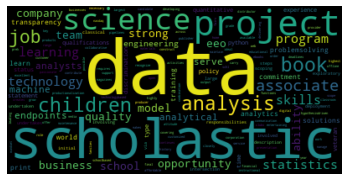

---
 Business Solutions Analyst ---



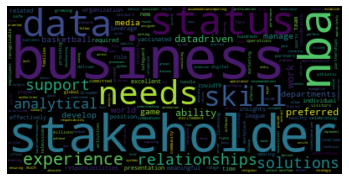

---
 Data Analyst ---



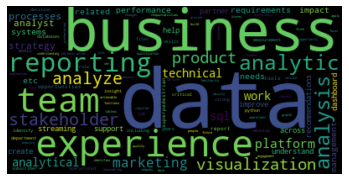

---
 Data Analyst - Medical ---



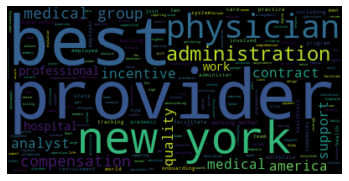

---
 New Graduate Data Analyst ---



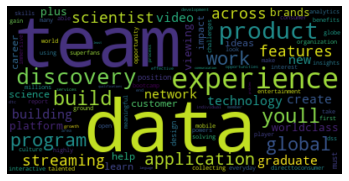

---
 Project Employee, Data Analyst ---



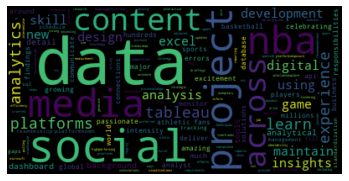

---
 Search Data Analyst ---



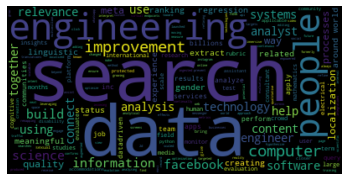

---
 Senior Data Analyst ---



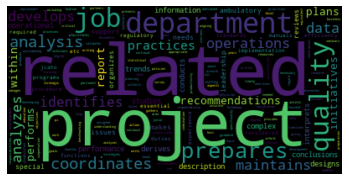

---
 Senior Data Analyst (Games) ---



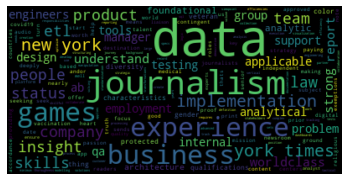

---
 Youth Apprentice - Data Analytics Associate ---



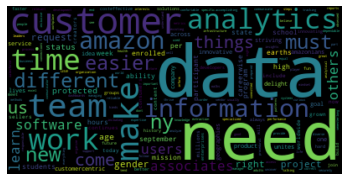

In [52]:
for v in jobshow:

    # Start with one review:
    text = jobList[jobList.Position == v].iloc[0].JobDescription 
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    print("---\n",v,"---\n")
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
test = data['JobDescription']

In [185]:
# TO TEST FREQUENCY OF WORDS IN ORDER TO ADD MORE STOP WORDS 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

c_vec = CountVectorizer(ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(test)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
data_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'bigram/trigram'})

data_ngram[0:40]

,frequency,bigram/trigram
0,12,new york
1,7,data science
2,6,job description
3,6,bachelors degree
4,6,around world
5,5,the data
6,5,sexual orientation
7,5,national origin
8,5,gender identity
9,5,equal opportunity


In [214]:
more_stop = ['data', 'business','experience','new york','team','build','data science','job description',
                    'the data','the new york','new york times','data analysis','data analyst','analysis',
             "you'll",'salary','connect''associate', 'key', 'available', 'key', 'available','notebooks', 'final','nba','regard', 'sexual', 'other','best', 'weill', 'metro','everyday', 'organizes']

data['JobDescription'] = data.JobDescription.apply(lambda x: ' '.join([word for word in x.split() if word not in (more_stop)]))

data['JobDescription']

0     analyst project at were passionate growing cel...
1     job description job description analyzes verif...
2     location new york new york shift day flex unit...
3     job summary analysts disney streaming engageme...
4     job description the opportunity responsibiliti...
5     superpedestrian engineering future micromobili...
6     meta platforms inc meta formerly known faceboo...
7     at were passionate growing celebrating game ba...
8     the mission the new york times seek truth help...
9     job description job description conducts compl...
10    marketing central measuring aspects critical o...
11    students must 16 september 2021 enrolled high ...
12    overview about organization discovery directto...
Name: JobDescription, dtype: object

---
 Associate Data Science Analyst ---



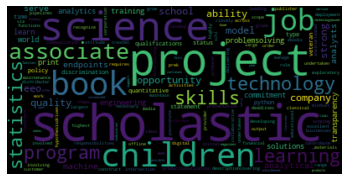

---
 Business Solutions Analyst ---



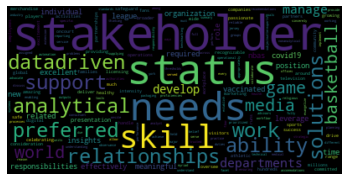

---
 Data Analyst ---



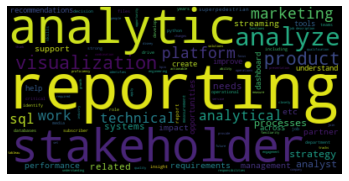

---
 Data Analyst - Medical ---



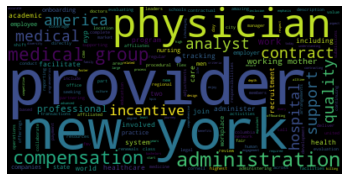

---
 New Graduate Data Analyst ---



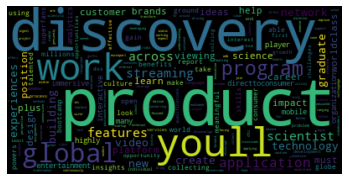

---
 Project Employee, Data Analyst ---



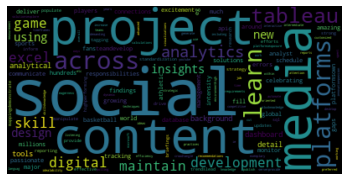

---
 Search Data Analyst ---



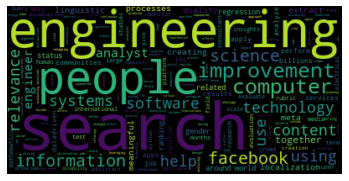

---
 Senior Data Analyst ---



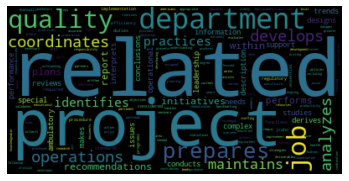

---
 Senior Data Analyst (Games) ---



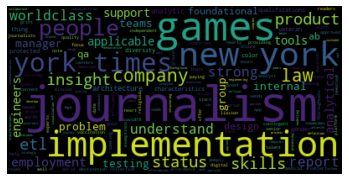

---
 Youth Apprentice - Data Analytics Associate ---



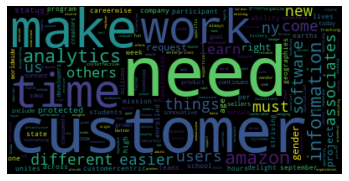

In [215]:
#REPEAT TO SEE NEW WORD CLOUDS AFTER REMOVING MORE STOP WORDS

jobList = data.groupby(['Position']).sum().reset_index()

for v in jobshow:

    # Start with one review:
    text = jobList[jobList.Position == v].iloc[0].JobDescription 
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    print("---\n",v,"---\n")
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [216]:
X = c_vec.fit_transform(data['JobDescription'])
Y = data['Position']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=150) 
print(X_train.shape,X_test.shape)


(10, 7676) (3, 7676)


In [217]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

In [219]:
clf = MultinomialNB()
clf.fit(X_train, Y_train)
Y_predicted = clf.predict(X_test)
print(Y_predicted)
accs = cross_val_score(clf, X, Y, scoring="accuracy", cv=2)
print("Accuracy of our classifier is " + str(round(np.mean(accs), 3)))

['Project Employee, Data Analyst' 'Project Employee, Data Analyst'
 'Senior Data Analyst']
Accuracy of our classifier is 0.0


/Users/camillebai/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


In [220]:
print(classification_report(Y_test, Y_predicted))
print("Accuracy : ",accuracy_score(Y_test, Y_predicted))

                                             precision    recall  f1-score   support

                               Data Analyst       0.00      0.00      0.00       2.0
             Project Employee, Data Analyst       0.00      0.00      0.00       0.0
                        Senior Data Analyst       0.00      0.00      0.00       0.0
Youth Apprentice - Data Analytics Associate       0.00      0.00      0.00       1.0

                                   accuracy                           0.00       3.0
                                  macro avg       0.00      0.00      0.00       3.0
                               weighted avg       0.00      0.00      0.00       3.0

Accuracy :  0.0


/Users/camillebai/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/camillebai/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/camillebai/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/camil

In [221]:
feature=c_vec.get_feature_names()
feature

['02 years',
 '02 years analytical',
 '100 companies',
 '100 companies working',
 '100 year',
 '100 year history',
 '12 producer',
 '12 producer educational',
 '13 years',
 '13 years relevant',
 '16 hours',
 '16 hours per',
 '16 september',
 '16 september 2021',
 '160 countries',
 '160 countries its',
 '1700 strong',
 '1700 strong sends',
 '1st 2022',
 '1st 2022 after',
 '2004 changed',
 '2004 changed way',
 '2020 americas',
 '2020 americas employers',
 '2020 companies',
 '2020 companies multicultural',
 '2020 working',
 '2020 working mother',
 '2020 workplace',
 '2020 workplace men',
 '2021 employees',
 '2021 employees choice',
 '2021 enrolled',
 '2021 enrolled high',
 '2021 springsummer',
 '2021 springsummer 2022',
 '2021 workplaces',
 '2021 workplaces health',
 '20212022 usnews',
 '20212022 usnews world',
 '2022 after',
 '2022 after date',
 '2022 analytics',
 '2022 analytics utilize',
 '2022 discovery',
 '2022 discovery dtc',
 '2022 must',
 '2022 must least',
 '2022 program',
 '2022

In [196]:
#training set 
cv_desc_train = pd.DataFrame(X_train.todense(),columns=feature)
cv_desc_train


,02 years,02 years analytical,100 best,100 best companies,100 year,100 year history,12 producer,12 producer educational,13 years,13 years relevant,...,youll make,youll make almost,youll receive,youll receive tailored,youll solving,youll solving everyday,youtube analytics,youtube analytics etc,zones product,zones product configurations
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
5,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
#testing set
cv_desc_test= pd.DataFrame(X_test.toarray(),columns=feature)
cv_desc_test

,02 years,02 years analytical,100 best,100 best companies,100 year,100 year history,12 producer,12 producer educational,13 years,13 years relevant,...,youll make,youll make almost,youll receive,youll receive tailored,youll solving,youll solving everyday,youtube analytics,youtube analytics etc,zones product,zones product configurations
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [170]:
clf.classes_

array(['Associate Data Science Analyst', 'Business Solutions Analyst',
       'Data Analyst', 'Data Analyst - Medical',
       'New Graduate Data Analyst', 'Project Employee, Data Analyst',
       'Search Data Analyst', 'Senior Data Analyst',
       'Senior Data Analyst (Games)'], dtype='<U30')

In [222]:
from textblob import TextBlob


feature_num = len(feature)

n_max = int(feature_num * 0.1)


result = pd.DataFrame(columns = ['Position', 'Top skills'])
for cl in range(0,len(clf.classes_)):
    t = clf.classes_[cl]
    print("\n---" ,clf.classes_[cl],"---\n")
    class_prob_indices_sorted = clf.feature_log_prob_[cl, :].argsort()[::-1]
    raw_skills = np.take(feature, class_prob_indices_sorted[:n_max])
    print("complete list of skills :")
    #print(raw_skills)


    # transform list to string
    txt = " ".join(raw_skills)
    blob = TextBlob(txt)
    #top 6 adjective
    top_adjectives = [w for (w, pos) in TextBlob(txt).pos_tags if pos.startswith("JJ")][:10]
    print("Top 10 adjectives: ",top_adjectives)
    
    result = result.append({'Position': t,'Top skills':top_adjectives},ignore_index=True)
    
      
            
            
    
    
    
    
    


--- Associate Data Science Analyst ---

complete list of skills :
Top 10 adjectives:  ['associate', 'customized', 'range', 'exploratory', 'national', 'customized', 'scholastic', 'undertakes', 'large', 'creative']

--- Business Solutions Analyst ---

complete list of skills :
Top 10 adjectives:  ['meaningful', 'excitement', 'understanding', 'marital', 'multiple', 'marital', 'multiple', 'specific', 'celebrating', 'implement']

--- Data Analyst ---

complete list of skills :
Top 10 adjectives:  ['strong', 'analytical', 'youll', 'critical', 'urban', 'generous', 'analytical', 'analytical', 'generous', 'operational']

--- Data Analyst - Medical ---

complete list of skills :
Top 10 adjectives:  ['new', 'medical', 'medical', 'professional', 'understanding', 'equivalent', 'fmv', 'foster', 'biopharma', 'equivalent']

--- New Graduate Data Analyst ---

complete list of skills :
Top 10 adjectives:  ['global', 'platform', 'global', 'modern', 'global', 'internal', 'global', 'global', 'many', 'mode

In [198]:
result

,Position,Top skills
0,Associate Data Science Analyst,"[associate, key, available, key, available, di..."
1,Business Solutions Analyst,"[nba, analytical, marital, marital, regard, se..."
2,Data Analyst,"[strong, analytical, critical, needs, urban, s..."
3,Data Analyst - Medical,"[new, best, medical, recruitment, medical, bes..."
4,New Graduate Data Analyst,"[global, directtoconsumer, global, platform, p..."
5,"Project Employee, Data Analyst","[learn, new, digital, social, effective, effec..."
6,Search Data Analyst,"[international, related, large, scale, meaning..."
7,Senior Data Analyst,"[essential, essential, necessary, national, un..."
8,Senior Data Analyst (Games),"[new, new, new, new, sexual, religious, religi..."
